In [2]:
import pandas as pd
import time
import os
from faker import Faker
import matplotlib.pyplot as plt

In [3]:
fake = Faker()
data = []
for _ in range(100000):  # Generate 100,000 records
    data.append({
        'name': fake.name(),
        'address': fake.address(),
        'email': fake.email(),
        'date_joined': fake.date(),
        'salary': fake.random_number(digits=5)
    })
df = pd.DataFrame(data)

In [4]:
def write_csv(df, filename):
    start = time.time()
    df.to_csv(filename, index=False)
    return time.time() - start

def write_parquet(df, filename):
    start = time.time()
    df.to_parquet(filename)
    return time.time() - start

In [9]:
def read_csv(filename):
    start = time.time()
    df = pd.read_csv(filename)
    return time.time() - start

def read_parquet(filename):
    start = time.time()
    df = pd.read_parquet(filename)
    return time.time() - start

In [10]:
csv_file = 'data.csv'
parquet_file = 'data.parquet'

In [11]:
write_times = {
    'CSV': write_csv(df, csv_file),
    'Parquet': write_parquet(df, parquet_file)
}

In [12]:
read_times = {
    'CSV': read_csv(csv_file),
    'Parquet': read_parquet(parquet_file)
}

In [13]:
labels = ['CSV', 'Parquet']
write_times_values = [write_times['CSV'], write_times['Parquet']]
read_times_values = [read_times['CSV'], read_times['Parquet']]

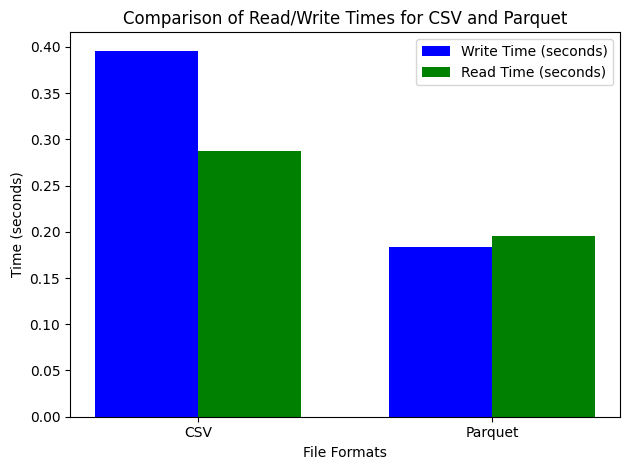

In [14]:
# Plotting
x = range(len(labels))
width = 0.35  # Width of bars

fig, ax = plt.subplots()
ax.bar(x, write_times_values, width, label='Write Time (seconds)', color='b')
ax.bar([p + width for p in x], read_times_values, width, label='Read Time (seconds)', color='g')

# Adding labels and title
ax.set_xlabel('File Formats')
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Read/Write Times for CSV and Parquet')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#other file formats


In [18]:
pip install pandas fastavro xlsxwriter


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\acer\appdata\local\programs\python\python312\lib\site-packages (2.2.2)




[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


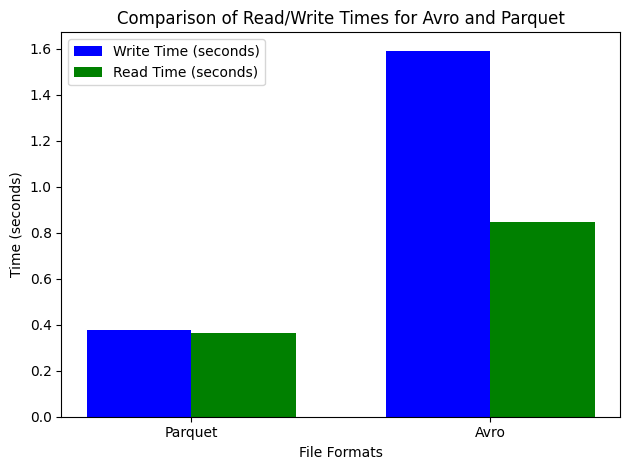

In [22]:
import pandas as pd
import time
import fastavro
from faker import Faker
import matplotlib.pyplot as plt

# Generate synthetic data
fake = Faker()
data = []
for _ in range(100000):  # Generate 100,000 records
    data.append({
        'name': fake.name(),
        'address': fake.address(),
        'email': fake.email(),
        'date_joined': fake.date(),
        'salary': fake.random_number(digits=5)
    })
df = pd.DataFrame(data)

# Define functions to write and read data for Avro and Parquet
def write_parquet(df, filename):
    start = time.time()
    df.to_parquet(filename)
    return time.time() - start

def read_parquet(filename):
    start = time.time()
    pd.read_parquet(filename)
    return time.time() - start

def write_avro(df, filename):
    start = time.time()
    schema = {
        "type": "record",
        "name": "Employee",
        "fields": [
            {"name": "name", "type": "string"},
            {"name": "address", "type": "string"},
            {"name": "email", "type": "string"},
            {"name": "date_joined", "type": "string"},
            {"name": "salary", "type": "int"}
        ]
    }
    records = df.to_dict(orient="records")
    with open(filename, "wb") as f:
        fastavro.writer(f, schema=schema, records=records)
    return time.time() - start

def read_avro(filename):
    start = time.time()
    with open(filename, "rb") as f:
        [record for record in fastavro.reader(f)]
    return time.time() - start

# File paths
files = {
    'Parquet': 'data.parquet',
    'Avro': 'data.avro'
}

# Write and read times for Avro and Parquet
write_times = {
    'Parquet': write_parquet(df, files['Parquet']),
    'Avro': write_avro(df, files['Avro'])
}

read_times = {
    'Parquet': read_parquet(files['Parquet']),
    'Avro': read_avro(files['Avro'])
}

# Prepare data for plotting
labels = list(write_times.keys())
write_times_values = list(write_times.values())
read_times_values = list(read_times.values())

# Plotting
x = range(len(labels))
width = 0.35  # Width of bars

fig, ax = plt.subplots()
ax.bar(x, write_times_values, width, label='Write Time (seconds)', color='b')
ax.bar([p + width for p in x], read_times_values, width, label='Read Time (seconds)', color='g')

# Adding labels and title
ax.set_xlabel('File Formats')
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Read/Write Times for Avro and Parquet')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


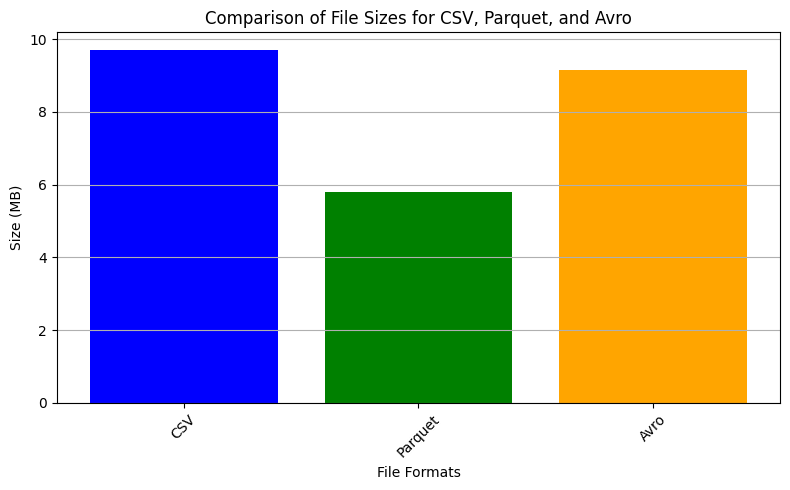

In [23]:
import pandas as pd
import os
import fastavro
from faker import Faker
import matplotlib.pyplot as plt

# Generate synthetic data
fake = Faker()
data = [
    {
        'name': fake.name(),
        'address': fake.address(),
        'email': fake.email(),
        'date_joined': fake.date(),
        'salary': fake.random_number(digits=5)
    }
    for _ in range(100000)  # 100,000 records for realistic size comparison
]
df = pd.DataFrame(data)

# Define functions to write data in different formats
def write_csv(df, filename):
    df.to_csv(filename, index=False)

def write_parquet(df, filename):
    df.to_parquet(filename)

def write_avro(df, filename):
    schema = {
        "type": "record",
        "name": "Employee",
        "fields": [
            {"name": "name", "type": "string"},
            {"name": "address", "type": "string"},
            {"name": "email", "type": "string"},
            {"name": "date_joined", "type": "string"},
            {"name": "salary", "type": "int"}
        ]
    }
    records = df.to_dict(orient="records")
    with open(filename, "wb") as f:
        fastavro.writer(f, schema=schema, records=records)

# File paths
csv_file = 'data.csv'
parquet_file = 'data.parquet'
avro_file = 'data.avro'

# Write files in different formats
write_csv(df, csv_file)
write_parquet(df, parquet_file)
write_avro(df, avro_file)

# Calculate file sizes (in MB)
file_sizes = {
    'CSV': os.path.getsize(csv_file) / (1024 * 1024),      # Convert bytes to MB
    'Parquet': os.path.getsize(parquet_file) / (1024 * 1024),
    'Avro': os.path.getsize(avro_file) / (1024 * 1024)
}

# Prepare data for plotting
labels = list(file_sizes.keys())
sizes = list(file_sizes.values())

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=['blue', 'green', 'orange'])
plt.xlabel('File Formats')
plt.ylabel('Size (MB)')
plt.title('Comparison of File Sizes for CSV, Parquet, and Avro')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Clean up generated files (optional)
os.remove(csv_file)
os.remove(parquet_file)
os.remove(avro_file)
